# L1 Regularization :Lasso Regression on Iris Dataset

**Import the required Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 

**Read the data set**

In [4]:
irisDataSet = pd.read_csv("iris.csv")
irisDataSet.head(3)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa


**Drop the first column as it is unwanted**

In [5]:
iris=irisDataSet.drop(labels ="Unnamed: 0" ,axis = 1)
iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


**Data Pre-processing**

In [6]:
iris.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

**Identify the unique elements of the categorical data variable "Species"**

In [7]:
print(irisDataSet['Species'].unique())

['setosa' 'versicolor' 'virginica']


**Count the number of unique elements of the categorical data variable "Species"**

In [8]:
irisDataSet['Species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

**Label Encoding**

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Label.Encoded.Species'] = le.fit_transform(iris.Species)

In [10]:
iris.head(4)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Label.Encoded.Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0


**Drop the Species column as it is now Label Encoded**

In [11]:
iris=iris.drop("Species",axis = 1)

In [12]:
iris.head(4)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label.Encoded.Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


**Correlation matrix**

In [13]:
# check for highest feature correlation with the target variable
iris.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label.Encoded.Species
Sepal.Length,1.000000,-0.117570,0.871754,0.817941,0.782561
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
Petal.Length,0.871754,-0.428440,1.000000,0.962865,0.949035
Petal.Width,0.817941,-0.366126,0.962865,1.000000,0.956547
Label.Encoded.Species,0.782561,-0.426658,0.949035,0.956547,1.000000


**Exploratory Data Analysis**

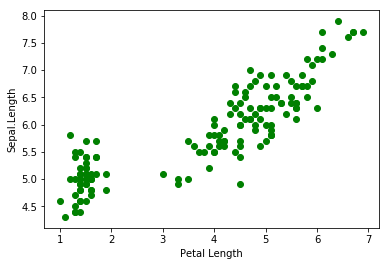

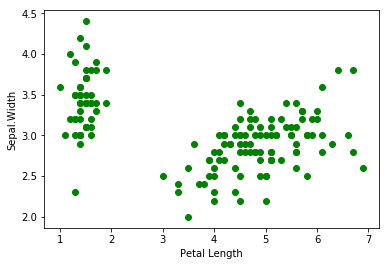

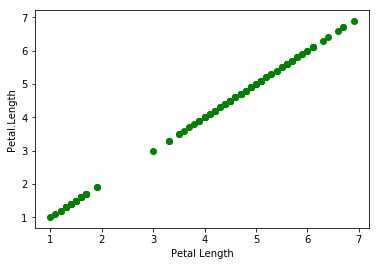

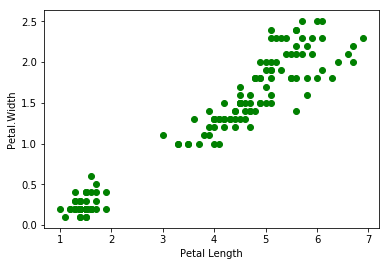

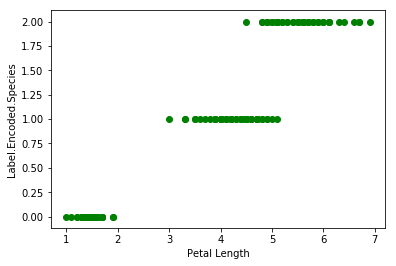

In [14]:
for colNames in iris.columns:
    plt.scatter(iris["Petal.Length"],iris[colNames],color = "green")
    plt.xlabel("Petal Length")
    plt.ylabel(colNames)
    plt.show()

**Prepare the data for sampling**

In [15]:
X = iris[["Sepal.Length","Sepal.Width","Petal.Width","Label.Encoded.Species"]]
Y = iris[["Petal.Length"]]

**Split the data into training and testing sets**

In [16]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state=30)

/home/varshita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


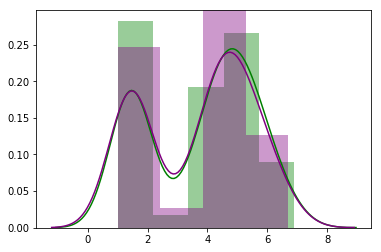

In [17]:
#check if the sampling done is good or bad

sb.distplot(Y,color = "green")
sb.distplot(ytrain,color = "purple")

**Observation : The sampling done is good.**

# Multiple Linear Regression

**Train the model using sklearn LinearRegression**

In [18]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
modelMLR = mlr.fit(xtrain, ytrain)

In [19]:
# calculate the coefficient values

b0 = modelMLR.intercept_
b = modelMLR.coef_

print("The value of intercept is %.3f"%b0)
print("The value of coefficients are ",b)

The value of intercept is -0.252
The value of coefficients are  [[ 0.71394621 -0.60403495  1.10495328  0.3856503 ]]


In [20]:
predictMLR=modelMLR.predict(xtest)

In [21]:
ytest["Predicted"] = predictMLR

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
ytest["Residual"] = ytest['Petal.Length'] - ytest.Predicted

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
ytest.head()

,Petal.Length,Predicted,Residual
20,1.7,1.770403,-0.070403
5,1.7,1.689376,0.010624
3,1.5,1.380457,0.119543
101,5.1,5.128527,-0.028527
82,3.9,3.969410,-0.069410


# Lasso Regression

**Create a list of values for shrinkage paramater "alpha" **

In [28]:
tuningParameterList = []
for i in range(0,1000):
    tuningParameterList.append(i*0.0001)
    
tp = {"alpha":tuningParameterList}

**Train the model using sklearn Lasso**

In [29]:
from sklearn.linear_model import Lasso
ls = Lasso()

**Find the best value of shrinkage parameter "alpha" to reduce the model error using cross validation**

In [30]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(ls,tp,scoring="neg_mean_squared_error",cv=4)
lsmodel = cv.fit(xtrain,ytrain)
print(lsmodel.best_params_)

/home/varshita/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/home/varshita/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/varshita/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/varshita/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimato

{'alpha': 0.0033}


**Evaluate the model with alpha and make predictions**

In [31]:
ls = Lasso(alpha=0.0033)
modelLasso = ls.fit(xtrain,ytrain)
predictLasso = modelLasso.predict(xtest)

In [33]:
ytest["Predicted"] = predictLasso

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
ytest["Residual"] = ytest['Petal.Length'] - ytest.Predicted

/home/varshita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
ytest.head()

,Petal.Length,Predicted,Residual
20,1.7,1.775119,-0.075119
5,1.7,1.703730,-0.003730
3,1.5,1.385563,0.114437
101,5.1,5.128396,-0.028396
82,3.9,3.961313,-0.061313


**Model Error calculations of Multiple Linear Regression **

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MaeMLR= mean_absolute_error(ytest['Petal.Length'],predictMLR)
print("The mean absolute error of the model is %f"%MaeMLR)

MseMLR=mean_squared_error(ytest['Petal.Length'],predictMLR)
print("The mean squared error of the model is %f"%MseMLR)

The mean absolute error of the model is 0.237354
The mean squared error of the model is 0.103001


**Model Error calculations of Lasso Regression **

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MaeLasso = mean_absolute_error(ytest['Petal.Length'],predictLasso)
print("The mean absolute error of the model is %f"%MaeLasso)
MseLasso=mean_squared_error(ytest['Petal.Length'],predictLasso)
print("The mean squared error of the model is %f"%MseLasso)

The mean absolute error of the model is 0.234775
The mean squared error of the model is 0.101451


**Observation : The Mean absolute  error and Mean squared error of  Lasso Regression is lower than the Multiple Linear Regression**